In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pylab as py

In [66]:
df = pd.read_csv(r"C:\Users\SURAJ\Downloads\50_Startups.csv")
df = df.dropna()
df.shape

(50, 5)

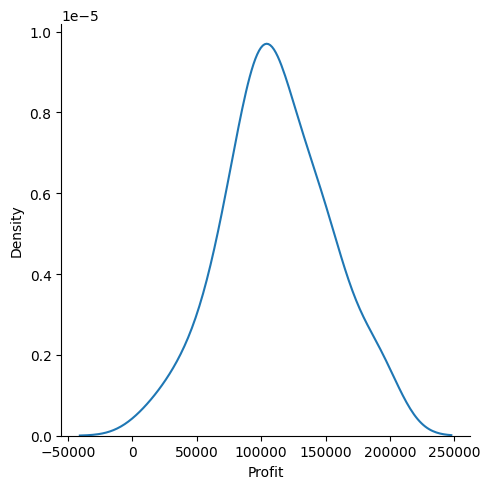

In [67]:
sns.displot((df.Profit),kind="kde")

In [68]:
df.Profit.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [69]:
df.Profit.skew()

0.023291019769116614

In [70]:
df.Profit.kurt()

-0.06385888546853113

{'whiskers': [<matplotlib.lines.Line2D at 0x22c86131880>,
 'caps': [<matplotlib.lines.Line2D at 0x22c86131ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c861315e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c86141220>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c861414c0>],
 'means': []}

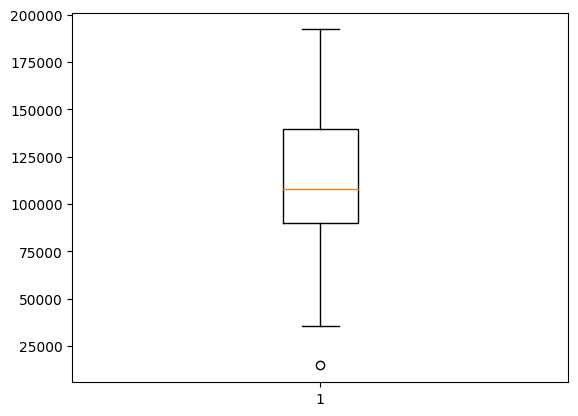

In [71]:
plt.boxplot(df.Profit)

In [72]:
df1 =df[df !=0].dropna()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
df1.shape

(46, 5)

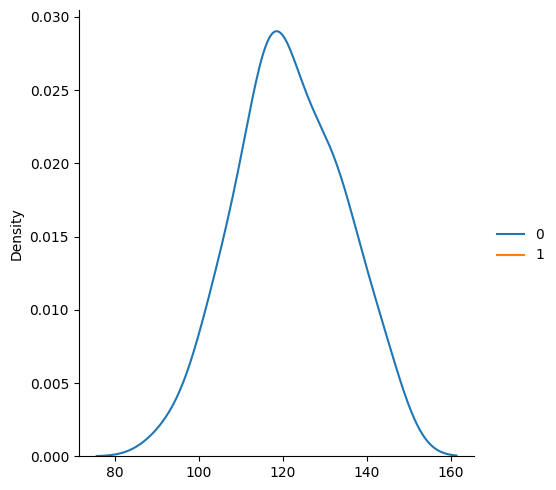

In [74]:
import scipy.stats as stats

sns.displot(stats.boxcox(df1.Profit),kind="kde")

In [75]:
stats.boxcox(df1.Profit)

(array([144.17024351, 144.05654334, 143.87664554, 141.86796613,
        137.54758477, 135.04217492, 134.80040405, 134.69716292,
        133.70032724, 133.00074161, 131.94809916, 131.40222355,
        130.61006544, 128.40065491, 127.87137342, 127.02800569,
        126.09606029, 125.57258306, 125.21392212, 123.29441216,
        120.8306094 , 120.49186831, 119.91672189, 119.85168943,
        119.43974997, 118.83463594, 118.56994148, 117.93494021,
        117.0857023 , 116.6833476 , 115.74671449, 115.72526135,
        115.47479556, 115.44921055, 115.35884366, 113.0740187 ,
        112.76617841, 109.09494885, 108.99746929, 107.77452615,
        107.57677563, 104.66444907, 103.82957455, 101.57185066,
        101.43262284,  92.845098  ]),
 0.3155638085971519)

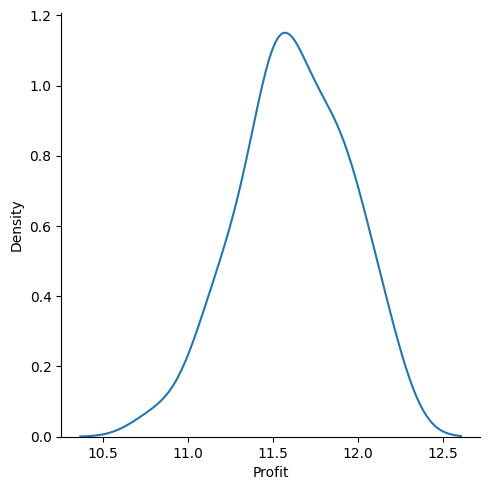

In [76]:
sns.displot(np.log(df1.Profit),kind='kde')

In [77]:

df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# log_trasformation

In [78]:
import statsmodels.api as sm
y = np.log(df1.Profit)
x= df1.drop(["Profit",'State'],axis=1)
x1= sm.add_constant(x)
model=sm.OLS(y,x1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     233.3
Date:                Thu, 11 May 2023   Prob (F-statistic):           3.32e-26
Time:                        18:21:00   Log-Likelihood:                 54.339
No. Observations:                  46   AIC:                            -100.7
Df Residuals:                      42   BIC:                            -93.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.1421      0.063    177.133      0.000      11.015      11.269
R&D Spend        7.152e-06   4.03e-07     17.729      0.000    6.34e-06    7.97e-06
Administration  -5.626e-07   4.66e-07     -1.208      0.234    -1.5e-06    3.77e-07
Marketing Spend -4.348e-08   1.56e-07     -0.279      0.782   -3.58e-07    2.71e-07
==============================================================================
Omnibus:                        9.051   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.544
Skew:                          -0.647   Prob(JB):                      0.00513
Kurtosis:                       4.957   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9547202587127686, pvalue=0.07141920924186707)

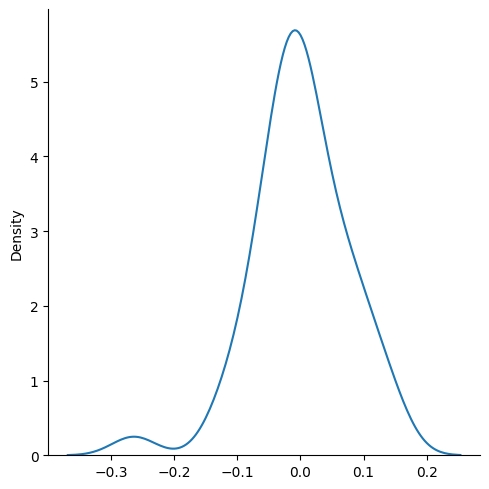

In [80]:
sns.displot(model.resid,kind='kde')

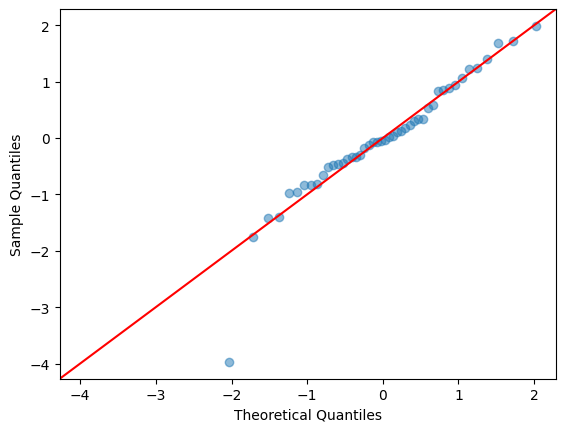

In [81]:
# Normal pp-plot for residual
from statsmodels.graphics.gofplots import ProbPlot
p =model.get_influence()
ProbPlot(p.resid_studentized_internal).qqplot(alpha=0.5,line="45")
py.show()

Text(0, 0.5, 'Residual')

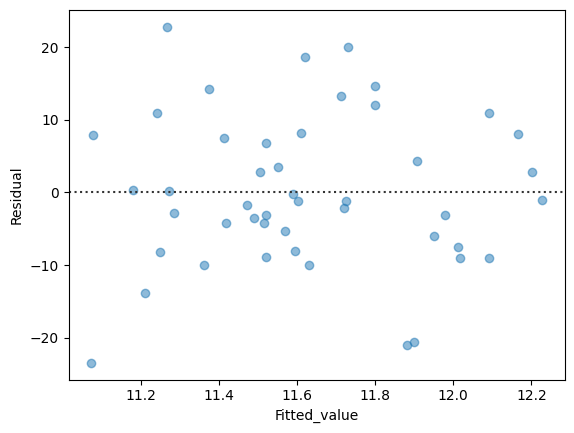

In [82]:
# homogenity
sns.residplot(model.fittedvalues, np.sqrt(df1.Profit)
            ,scatter_kws={'alpha': 0.5})

plt.xlabel("Fitted_value")
plt.ylabel("Residual")

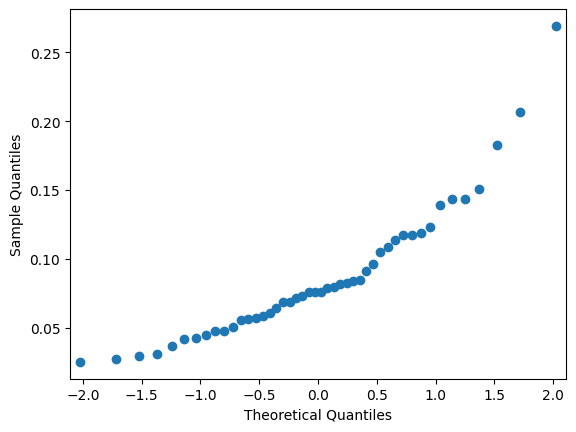

In [83]:
# leverage point
p = model.get_influence()
ProbPlot(p.hat_matrix_diag).qqplot()
py.show()

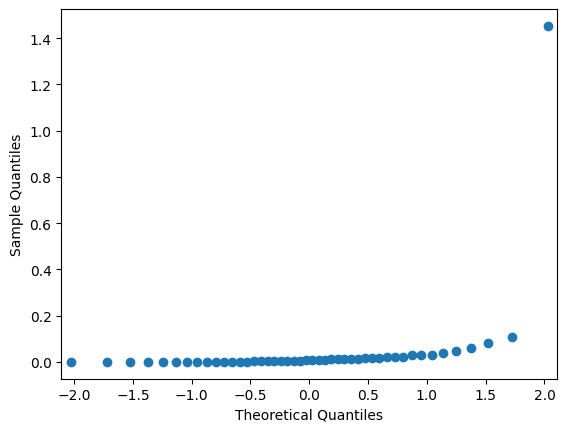

In [84]:
# influence point
ProbPlot(p.cooks_distance[0]).qqplot()
py.show()

Text(0, 0.5, 'abs_residual')

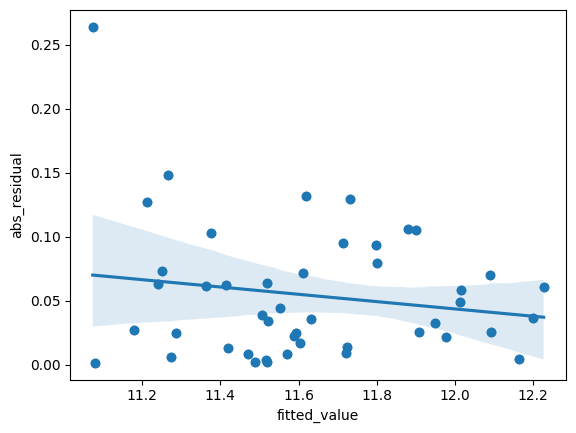

In [85]:
# scale and location plot
plt.scatter(model.predict(),np.abs(model.resid))
sns.regplot(model.predict(),np.abs(model.resid))
plt.xlabel("fitted_value")
plt.ylabel("abs_residual")

# applying SQRT transformation

In [86]:
import statsmodels.api as sm
y = np.sqrt(df1.Profit)
x= df1.drop(["Profit","State","Marketing Spend"],axis=1)
x1= sm.add_constant(x)
model1=sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     521.0
Date:                Thu, 11 May 2023   Prob (F-statistic):           7.20e-31
Time:                        18:21:03   Log-Likelihood:                -172.72
No. Observations:                  46   AIC:                             351.4
Df Residuals:                      43   BIC:                             356.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            257.4818      7.561     34.053      0.000     242.233     272.730
R&D Spend          0.0012   3.72e-05     31.937      0.000       0.001       0.001
Administration    -0.0001   6.06e-05     -1.658      0.105      -0.000    2.18e-05
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.017
Skew:                          -0.006   Prob(JB):                        0.991
Kurtosis:                       2.906   Cond. No.                     7.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
stats.shapiro(model1.resid)

ShapiroResult(statistic=0.9815912842750549, pvalue=0.6717280745506287)

* Normal p-p_plot of residual 

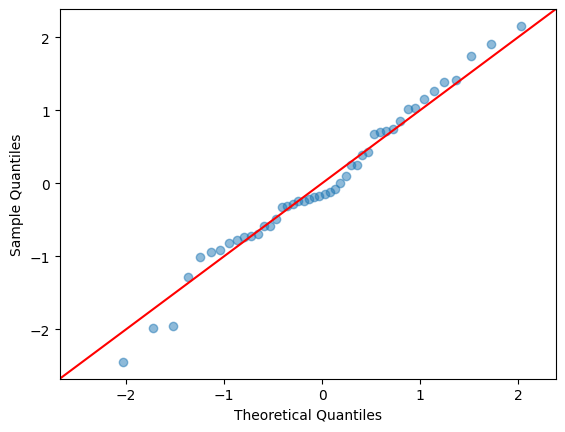

In [88]:
from statsmodels.graphics.gofplots import ProbPlot
s =model1.get_influence()
ProbPlot(s.resid_studentized_internal).qqplot(alpha=0.5,line="45")
py.show()

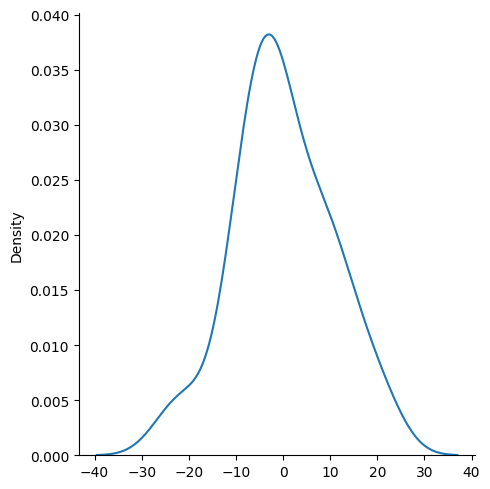

In [89]:
sns.displot(model1.resid,kind="kde")

Text(0, 0.5, 'Residual')

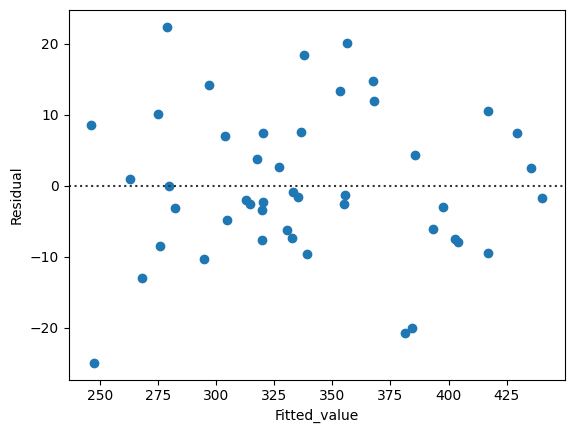

In [90]:
# homogenity (residual v/s fitted value)
sns.residplot(model1.fittedvalues, np.sqrt(df1.Profit)
            ,scatter_kws={'alpha': 1})

plt.xlabel("Fitted_value")
plt.ylabel("Residual")

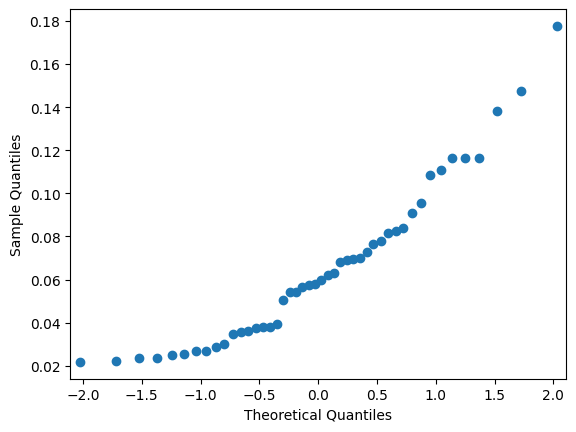

In [91]:
# leverage point
s = model1.get_influence()
ProbPlot(s.hat_matrix_diag).qqplot()
py.show()

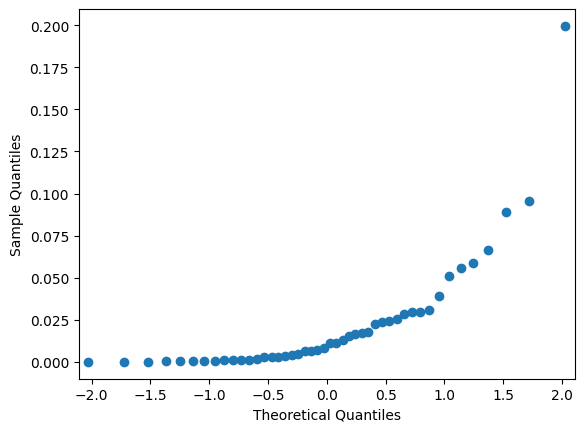

In [92]:
# influence point
ProbPlot(s.cooks_distance[0]).qqplot()
py.show()

Text(0, 0.5, 'abs_residual')

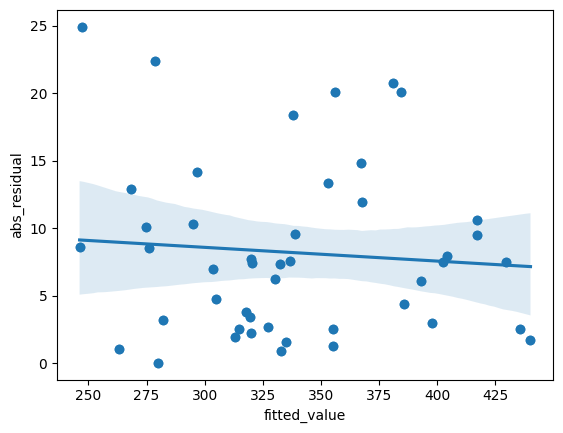

In [93]:
# scale and location plot
plt.scatter(model1.predict(),np.abs(model1.resid))
sns.regplot(model1.predict(),np.abs(model1.resid))
plt.xlabel("fitted_value")
plt.ylabel("abs_residual")

In [94]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.959   
Dependent Variable: Profit           AIC:                351.4362
Date:               2023-05-11 18:21 BIC:                356.9221
No. Observations:   46               Log-Likelihood:     -172.72 
Df Model:           2                F-statistic:        521.0   
Df Residuals:       43               Prob (F-statistic): 7.20e-31
R-squared:          0.960            Scale:              114.33  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          257.4818   7.5612 34.0530 0.0000 242.2332 272.7305
R&D Spend        0.0012   0.0000 31.9373 0.0000   0.0011   0.0013
Administration  -0.0001   0.0001 -1.6578 0.1046  -0.0002   0.0000
-----------------------------------------------------------------
Omnibus:              0.078        Durbin-Watson:          1.881 
Prob(Omnibus):        0.962        Jarque-Bera (JB):       0.017 
Skew:                 -0.006       Prob(JB):               0.991 
Kurtosis:             2.906        Condition No.:          715563
=================================================================
* The condition number is large (7e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [95]:
df1.State.value_counts()

Florida       16
New York      15
California    15
Name: State, dtype: int64

from sklearn.linear_model import LinearRegression
y = df1[['Profit']]
x= df1.drop("Profit",axis=1)
lm = LinearRegression()
lm.fit(y,x)

# create State Dummies

In [96]:
df_dummy = pd.get_dummies(df1)


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df_dummy.drop(["Profit"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature        VIF
0         R&D Spend   2.331870
1    Administration   1.171396
2   Marketing Spend   2.312491
3  State_California   9.998825
4     State_Florida  11.727062
5    State_New York  10.995771


In [135]:
import statsmodels.api as sm
y = np.sqrt(df_dummy.Profit)
x= df_dummy.drop(["Profit","Administration",'Marketing Spend'],axis=1)
x1= sm.add_constant(x)
model1=sm.OLS(y,x1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.955   
Dependent Variable:   Profit           AIC:                355.9176
Date:                 2023-05-11 19:01 BIC:                363.2322
No. Observations:     46               Log-Likelihood:     -173.96 
Df Model:             3                F-statistic:        320.7   
Df Residuals:         42               Prob (F-statistic): 5.79e-29
R-squared:            0.958            Scale:              123.53  
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
const            184.5357   2.5471 72.4481 0.0000 179.3953 189.6760
R&D_Spend          0.0012   0.0000 30.9580 0.0000   0.0011   0.0013
State_California  62.8167   2.4372 25.7741 0.0000  57.8982  67.7351
State_Florida     61.2048   2.4654 24.8255 0.0000  56.2295  66.1802
State_New_York    60.5142   2.5149 24.0618 0.0000  55.4388  65.5895
-------------------------------------------------------------------
Omnibus:         0.084    Durbin-Watson:      1.696                
Prob(Omnibus):   0.959    Jarque-Bera (JB):   0.062                
Skew:            -0.062   Prob(JB):           0.969                
Kurtosis:        2.869    Condition No.:      826709607133328441344
===================================================================
* The condition number is large (8e+20). This might indicate
strong multicollinearity or other numerical problems.
"""

In [144]:
print('pvlue_for_moedl : ',1- stats.f.cdf(320.7,3,42))

pvlue_for_moedl :  1.1102230246251565e-16


In [113]:
df_dummy.rename(columns={
    "R&D Spend" : "R&D_Spend",
    'State_New York': 'State_New_York'},inplace=True)

In [117]:
df_dummy.head()

,R&D_Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df_dummy.drop(["Profit","Marketing Spend","Administration"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature       VIF
0         R&D Spend  1.006425
1  State_California  1.943507
2     State_Florida  2.221304
3    State_New York  2.140238


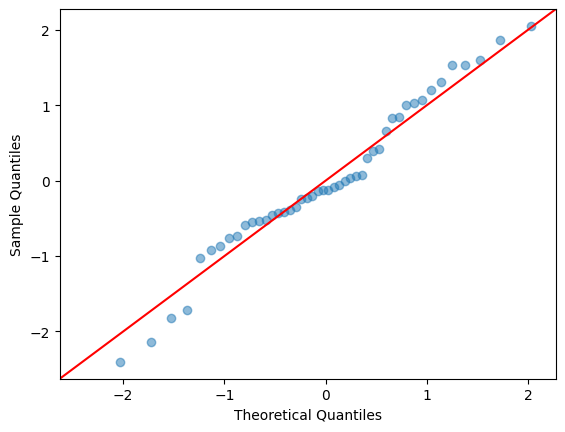

In [99]:
from statsmodels.graphics.gofplots import ProbPlot
s =model1.get_influence()
ProbPlot(s.resid_studentized_internal).qqplot(alpha=0.5,line="45")
py.show()

Text(0, 0.5, 'Residual')

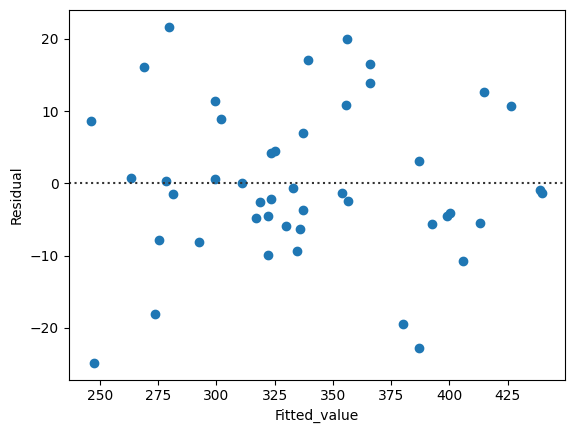

In [100]:
# homogenity (residual v/s fitted value)
sns.residplot(model1.fittedvalues, np.sqrt(df1.Profit)
            ,scatter_kws={'alpha': 1})

plt.xlabel("Fitted_value")
plt.ylabel("Residual")

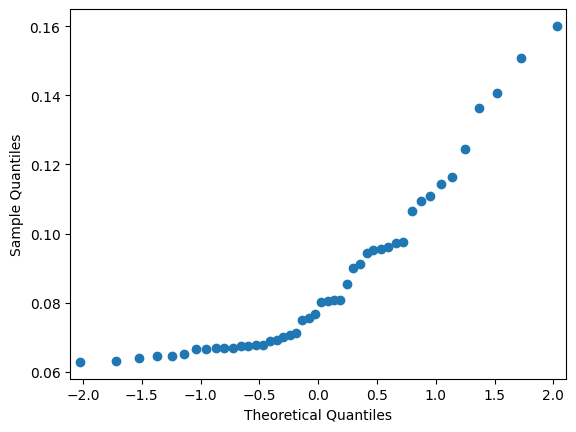

In [101]:
# leverage point
s = model1.get_influence()
ProbPlot(s.hat_matrix_diag).qqplot()
py.show()

Text(0, 0.5, 'abs_residual')

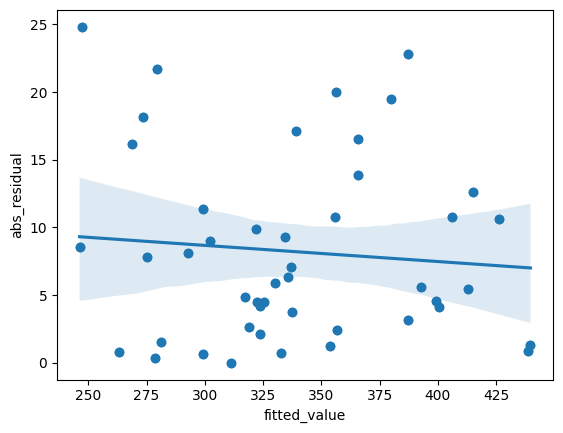

In [102]:
# scale and location plot
plt.scatter(model1.predict(),np.abs(model1.resid))
sns.regplot(model1.predict(),np.abs(model1.resid))
plt.xlabel("fitted_value")
plt.ylabel("abs_residual")

In [103]:
df1["State"] = df1.State.map({
    "New York" : 0,
    'California' : 1,
    'Florida' : 2
})

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df1.drop('Profit', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0        R&D Spend  9.389800
1   Administration  5.597213
2  Marketing Spend  9.434181
3            State  2.447013


In [105]:
import statsmodels.api as sm
y = np.sqrt(df_dummy.Profit)
x= df_dummy.drop(["Profit","State_New York","Marketing Spend"], axis=1)
x1= sm.add_constant(x)
model1=sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     250.1
Date:                Thu, 11 May 2023   Prob (F-statistic):           3.29e-28
Time:                        18:21:11   Log-Likelihood:                -172.57
No. Observations:                  46   AIC:                             355.1
Df Residuals:                      41   BIC:                             364.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              256.3992      8.206     31.246      0.000     239.827     272.971
R&D Spend            0.0012   3.81e-05     31.243      0.000       0.001       0.001
Administration   -9.911e-05    6.2e-05     -1.600      0.117      -0.000     2.6e-05
State_California     1.9870      3.999      0.497      0.622      -6.090      10.064
State_Florida        0.4611      3.925      0.117      0.907      -7.466       8.388
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.046
Skew:                          -0.009   Prob(JB):                        0.977
Kurtosis:                       2.845   Cond. No.                     7.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
import statsmodels.api as sm
y = np.sqrt(df_dummy.Profit)
x= df_dummy["R&D Spend"]
x1= sm.add_constant(x)
model1=sm.OLS(y,x1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.957   
Dependent Variable: Profit           AIC:                352.2862
Date:               2023-05-11 18:33 BIC:                355.9434
No. Observations:   46               Log-Likelihood:     -174.14 
Df Model:           1                F-statistic:        999.6   
Df Residuals:       44               Prob (F-statistic): 6.84e-32
R-squared:          0.958            Scale:              118.87  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      246.1720    3.3247  74.0435  0.0000  239.4715  252.8725
R&D Spend    0.0012    0.0000  31.6160  0.0000    0.0011    0.0013
-----------------------------------------------------------------
Omnibus:              0.098        Durbin-Watson:          1.637 
Prob(Omnibus):        0.952        Jarque-Bera (JB):       0.059 
Skew:                 -0.065       Prob(JB):               0.971 
Kurtosis:             2.882        Condition No.:          184867
=================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""